HOST_LOCATION:
 - Tipo de dato
 - Cantidad de nulos
 - Cantidad de Vacios
 - Cantidad de datos unicos
 - Cantidad de datos totales

In [1]:
import pandas as pd

# Cargar únicamente la columna 'city' del archivo CSV
file_path = "../0_Dataset/Listings.csv"
data = pd.read_csv(file_path, usecols=['host_location'], delimiter=',', encoding='latin-1')

# Verificar si la columna 'city' existe en el DataFrame
if 'host_location' in data.columns:
    # Tipo de dato
    tipo_dato = data['host_location'].dtype
    
    # Cantidad de nulos
    cantidad_nulos = data['host_location'].isna().sum()
    
    # Cantidad de vacíos (considerando cadenas vacías)
    cantidad_vacios = (data['host_location'] == '').sum()
    
    # Cantidad de datos únicos
    cantidad_unicos = data['host_location'].nunique()
    
    # Cantidad de datos totales
    cantidad_totales = data['host_location'].shape[0]
    
    # Imprimir resultados
    print(f"Columna 'host_location':")
    print(f" - Tipo de dato: {tipo_dato}")
    print(f" - Cantidad de nulos: {cantidad_nulos}")
    print(f" - Cantidad de vacíos: {cantidad_vacios}")
    print(f" - Cantidad de datos únicos: {cantidad_unicos}")
    print(f" - Cantidad de datos totales: {cantidad_totales}")
else:
    print("La columna 'host_location' no existe en el DataFrame.")

Columna 'host_location':
 - Tipo de dato: object
 - Cantidad de nulos: 840
 - Cantidad de vacíos: 0
 - Cantidad de datos únicos: 7159
 - Cantidad de datos totales: 279712


ANALISIS ERRONEO CON DATOS DUPLICADOS ESCRITOS O ABREVIADOS QUE VIENEN SIENDO LO MISMO 

In [2]:
if 'host_location' in data.columns: 
    # Moda
    moda = data['host_location'].mode()[0]
    
    # Cantidad por variable
    cantidad_por_variable = data['host_location'].value_counts()
    
    # Porcentaje por variable
    porcentaje_por_variable = (cantidad_por_variable / cantidad_totales) * 100
    
    # Imprimir resultados formateados
    print(f"Columna 'host_location':")
    print(f" - Moda: {moda}\n")
    print(" - Cantidad por variable:")
    for valor, cantidad in cantidad_por_variable.items():
        print(f"   {valor}: {cantidad}")
    print("\n - Porcentaje por variable:")
    for valor, porcentaje in porcentaje_por_variable.items():
        print(f"   {valor}: {porcentaje:.2f}%")
else:
    print("La columna 'host_location' no existe en el DataFrame.")

Columna 'host_location':
 - Moda: Paris, Ile-de-France, France

 - Cantidad por variable:
   Paris, Ile-de-France, France: 47794
   New York, New York, United States: 24040
   Rome, Lazio, Italy: 20138
   Cape Town, Western Cape, South Africa: 13602
   Rio de Janeiro, State of Rio de Janeiro, Brazil: 13211
   Sydney, New South Wales, Australia: 11350
   Istanbul, Istanbul, Turkey: 10575
   Mexico City, Mexico City, Mexico: 9955
   FR: 8294
   Bangkok, Thailand: 7788
   TR: 6257
   US: 4751
   IT: 4732
   AU: 4335
   BR: 4290
   New South Wales, Australia: 3249
   TH: 3217
   Hong Kong: 3094
   ZA: 3010
   MX: 2803
   Mexico City, Federal District, Mexico: 2769
   Brooklyn, New York, United States: 2729
   Rio de Janeiro, Rio de Janeiro, Brazil: 2267
   Istanbul, Turkey: 2191
   Bangkok, Bangkok, Thailand: 2090
   Rio, Rio de Janeiro, Brazil: 1597
   London, England, United Kingdom: 1390
   Queens, New York, United States: 1382
   HK: 1348
   China: 1135
   Mexico: 908
   Thailand: 863


TOP 20 PAISES CON MAYOR FRECUENCIA DE UBICACION DE ANFITRIONES SIN ELIMINAR DUPLICADOS

In [7]:
# Asegurarse de que la columna existe
if 'host_location' in data.columns:
    # Conteo de ocurrencias
    cantidad_por_variable = data['host_location'].value_counts()
    
    # Calcular total de registros para porcentajes
    cantidad_totales = data['host_location'].shape[0]
    
    # Calcular porcentaje por variable
    porcentaje_por_variable = (cantidad_por_variable / cantidad_totales) * 100

    # Mostrar solo las ubicaciones más frecuentes (por ejemplo, Top 20)
    top_n = 20
    print(f"🌍 Top {top_n} ubicaciones más frecuentes en 'host_location':\n")
    for i, (valor, cantidad) in enumerate(cantidad_por_variable.items()):
        if i < top_n:
            porcentaje = porcentaje_por_variable[valor]
            print(f"{valor}: {cantidad} registros ({porcentaje:.2f}%)")
        else:
            break
else:
    print("❌ La columna 'host_location' no existe en el DataFrame.")


🌍 Top 20 ubicaciones más frecuentes en 'host_location':

Paris, Ile-de-France, France: 47794 registros (17.09%)
New York, New York, United States: 24040 registros (8.59%)
Rome, Lazio, Italy: 20138 registros (7.20%)
Cape Town, Western Cape, South Africa: 13602 registros (4.86%)
Rio de Janeiro, State of Rio de Janeiro, Brazil: 13211 registros (4.72%)
Sydney, New South Wales, Australia: 11350 registros (4.06%)
Istanbul, Istanbul, Turkey: 10575 registros (3.78%)
Mexico City, Mexico City, Mexico: 9955 registros (3.56%)
FR: 8294 registros (2.97%)
Bangkok, Thailand: 7788 registros (2.78%)
TR: 6257 registros (2.24%)
US: 4751 registros (1.70%)
IT: 4732 registros (1.69%)
AU: 4335 registros (1.55%)
BR: 4290 registros (1.53%)
New South Wales, Australia: 3249 registros (1.16%)
TH: 3217 registros (1.15%)
Hong Kong: 3094 registros (1.11%)
ZA: 3010 registros (1.08%)
MX: 2803 registros (1.00%)


PAISES QUE CUMPLE CON EL FORMATO ESTANDAR O QUE SON RECONOCIDOS POR ESTAR ESCRITOS CORRECTAMENTE

In [13]:
# Top 20 ubicaciones más frecuentes
top_ubicaciones = data['host_location'].value_counts().head(20)

# Diccionario de posibles duplicados (manual, editable)
posibles_duplicados = {
    'FR': 'Paris, Ile-de-France, France',
    'US': 'New York, New York, United States',
    'IT': 'Rome, Lazio, Italy',
    'TR': 'Istanbul, Istanbul, Turkey',
    'BR': 'Rio de Janeiro, State of Rio de Janeiro, Brazil',
    'AU': 'Sydney, New South Wales, Australia',
    'MX': 'Mexico City, Mexico City, Mexico',
    'ZA': 'Cape Town, Western Cape, South Africa',
    'TH': 'Bangkok, Thailand',
    'New South Wales, Australia': 'Sydney, New South Wales, Australia',
    'Hong Kong': 'Hong Kong',  # mantener igual
}

# Mostrar solo las formas correctas (las que tienen más registros)
print("✅ Formas correctas (estándar) entre duplicados en el Top 20:\n")
for duplicado, correcto in posibles_duplicados.items():
    if duplicado in top_ubicaciones.index and correcto in top_ubicaciones.index:
        if top_ubicaciones[correcto] > top_ubicaciones[duplicado]:
            print(f"{correcto}: {top_ubicaciones[correcto]}")


✅ Formas correctas (estándar) entre duplicados en el Top 20:

Paris, Ile-de-France, France: 47794
New York, New York, United States: 24040
Rome, Lazio, Italy: 20138
Istanbul, Istanbul, Turkey: 10575
Rio de Janeiro, State of Rio de Janeiro, Brazil: 13211
Sydney, New South Wales, Australia: 11350
Mexico City, Mexico City, Mexico: 9955
Cape Town, Western Cape, South Africa: 13602
Bangkok, Thailand: 7788
Sydney, New South Wales, Australia: 11350


❌ Ubicaciones no consideradas como formato estándar en el Top 20
A continuación se listan las ubicaciones que, aunque aparecen dentro del Top 20 de host_location, no se consideraron como correctas o estándar ya que existen otras formas más completas que representan la misma ubicación y además tienen una mayor cantidad de registros. Por lo tanto, estas fueron descartadas como formas válidas para el análisis:

FR (2.97%)
🔄 Equivale a: Paris, Ile-de-France, France (17.09%)
❌ No se considera estándar por ser una abreviación del país sin detalle de ciudad ni región.

TR (2.24%)
🔄 Equivale a: Istanbul, Istanbul, Turkey (3.78%)
❌ Se descarta en favor de la versión con ciudad y región específica.

US (1.70%)
🔄 Equivale a: New York, New York, United States (8.59%)
❌ Es menos descriptiva y aparece con menos frecuencia.

IT (1.69%)
🔄 Equivale a: Rome, Lazio, Italy (7.20%)
❌ Forma abreviada del país, descartada por falta de especificidad.

AU (1.55%)
🔄 Equivale a: Sydney, New South Wales, Australia (4.06%)
❌ La forma completa da mayor contexto geográfico.

BR (1.53%)
🔄 Equivale a: Rio de Janeiro, State of Rio de Janeiro, Brazil (4.72%)
❌ Se considera duplicado con menor precisión.

New South Wales, Australia (1.16%)
🔄 Equivale a: Sydney, New South Wales, Australia (4.06%)
❌ Es una subregión sin ciudad específica.

TH (1.15%)
🔄 Equivale a: Bangkok, Thailand (2.78%)
❌ Menor especificidad territorial.

ZA (1.08%)
🔄 Equivale a: Cape Town, Western Cape, South Africa (4.86%)
❌ Menos detallada y menos frecuente.

MX (1.00%)
🔄 Equivale a: Mexico City, Mexico City, Mexico (3.56%)
❌ Es una versión abreviada del país.

NORMALIZACION EN PROCESO

In [5]:
# Copia segura del campo host_location
data['host_location_limpia'] = data['host_location'].astype(str)

# Extraer el país (último valor después de la coma)
data['host_country_limpio'] = data['host_location_limpia'].str.split(',').str[-1].str.strip()

# Diccionario de reemplazo para limpiar países mal escritos o abreviados
reemplazos_paises = {
    'FR': 'France', 'FRANCE': 'France',
    'US': 'United States', 'USA': 'United States',
    'IT': 'Italy', 'AU': 'Australia', 'BR': 'Brazil', 'MX': 'Mexico',
    'TR': 'Turkey', 'ZA': 'South Africa', 'TH': 'Thailand',
    'HK': 'Hong Kong'
}

data['host_country_limpio'] = data['host_country_limpio'].replace(reemplazos_paises)
# Cantidad por país limpio
conteo_limpio = data['host_country_limpio'].value_counts()
porcentaje_limpio = (conteo_limpio / len(data)) * 100

# Imprimir resultados
print("Columna 'host_country_limpio' (Análisis corregido):")
print(f" - Total países únicos: {data['host_country_limpio'].nunique()}")
print(" - Cantidad por país:")
for pais, cantidad in conteo_limpio.items():
    print(f"   {pais}: {cantidad}")
print("\n - Porcentaje por país:")
for pais, porcentaje in porcentaje_limpio.items():
    print(f"   {pais}: {porcentaje:.2f}%")


Columna 'host_country_limpio' (Análisis corregido):
 - Total países únicos: 780
 - Cantidad por país:
   France: 61568
   United States: 37743
   Australia: 31317
   Italy: 26762
   Brazil: 25296
   Turkey: 22227
   Mexico: 19021
   South Africa: 18001
   Thailand: 15589
   Hong Kong: 5951
   United Kingdom: 2138
   China: 1689
   nan: 840
   Istanbul: 784
   CN: 647
   Germany: 572
   Spain: 469
   Bangkok: 433
   GB: 392
   Switzerland: 352
   Canada: 341
   Singapore: 277
   IN: 274
   JP: 235
   Japan: 214
   ES: 204
   Netherlands: 203
   Argentina: 162
   Belgium: 153
   Portugal: 153
   IE: 125
   CA: 120
   India: 114
   Taiwan: 111
   United Arab Emirates: 110
   Bangkok Thailand: 110
   Head of Innovation & Revenue: 107
   DE: 107
   Brasil: 104
   Ireland: 102
   Israel: 96
   MY: 95
   New Zealand: 91
   Sweden: 90
   TW: 85
   Colombia: 83
   Ã©Â¦â¢Ã¦Â¸Â¯: 76
   London: 75
   Chile: 69
   Russia: 68
   South Korea: 67
   Mexico DF: 66
   RU: 66
   NY: 66
   CX: 64
   Aust

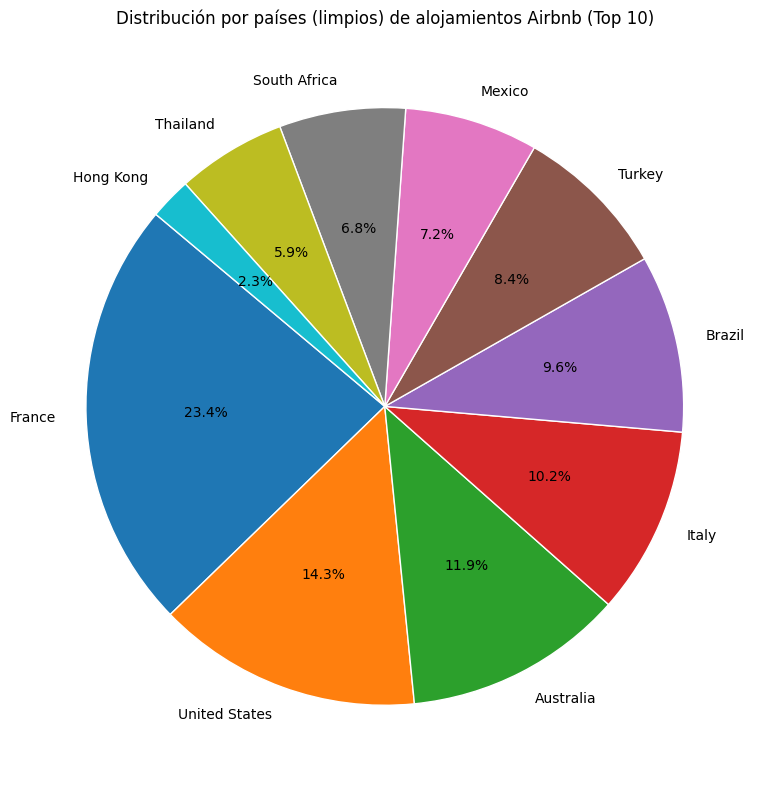

In [ ]:
import matplotlib.pyplot as plt

top_paises = conteo_limpio.head(10)

plt.figure(figsize=(10, 8))
plt.pie(top_paises,
        labels=top_paises.index,
        autopct='%1.1f%%',
        startangle=140,
        wedgeprops={'linewidth': 1, 'edgecolor': 'white'})
plt.title('Distribución por países de alojamientos Airbnb (Top 10)')
plt.tight_layout()
plt.show()


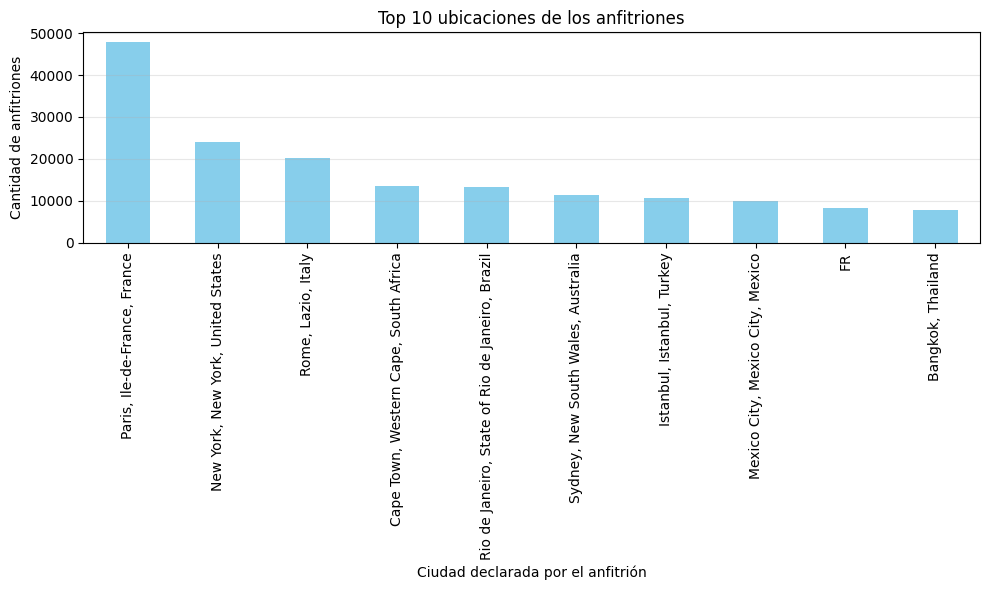

In [2]:
import matplotlib.pyplot as plt

top_ciudades = data['host_location'].value_counts().head(10)
top_ciudades.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Top 10 ubicaciones de los anfitriones')
plt.xlabel('Ciudad declarada por el anfitrión')
plt.ylabel('Cantidad de anfitriones')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()
